In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForObjectDetection

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-vision-models/full-models/DETREncoder-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [4]:
path = ["model.encoder.layers[", "].self_attn.q_proj.weight", "].self_attn.k_proj.weight"]

'DETR 50 (l = 6, d = 256, h = 8 ; 860M parameters)'
dh = 32
l = 6
d = 256
h = d // dh
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
sym_scores = get_scores_full(d, l, h, dh, model, path)
models['DETR-50'] = [l, d, h, dh, sym_scores]

In [5]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

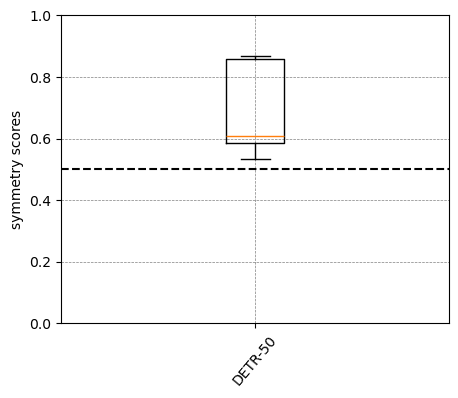

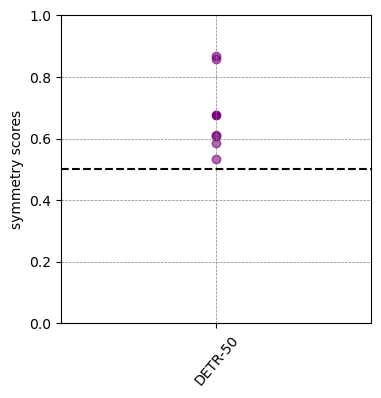

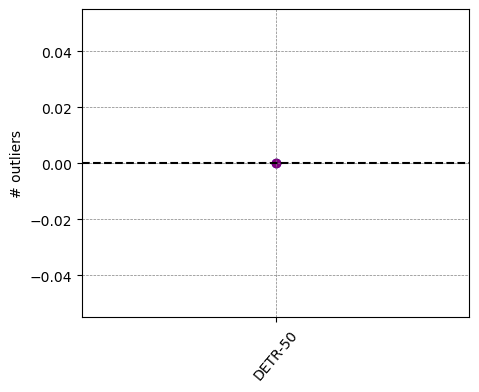

In [6]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)